In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.regression.linear_model import OLS
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import keras.backend as K
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


# Load the data
df_train = pd.read_csv('dataset.csv')
df_train = df_train.drop(columns=["index","predictions","error"])
df_train = df_train.sample(frac=1).reset_index(drop=True)
# Split the training data into features and labels
X_train = df_train.drop(columns=['sales'])
y_train = df_train['sales']

df_train.to_csv('submission_to_submit3.csv', index=False)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)


from statsmodels.stats.stattools import durbin_watson

# Fit a linear regression model to the data
model = OLS(y_train, X_train).fit()

# Perform the Durbin-Watson test
dw_stat = durbin_watson(model.resid)

# Print the Durbin-Watson statistic
print("Durbin-Watson statistic: ", dw_stat)

# Check for autocorrelation
if dw_stat < 2 or dw_stat > 2:
    print("There is autocorrelation in the data, the model is likely non-linear")
else:
    print("There is no autocorrelation in the data, the model is likely linear")
# Define the model
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)


# Make predictions on the validation set
predictions = model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, predictions)

# Take the square root of the mean squared error to get the root mean squared error
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Calculate the R-squared score
r2 = r2_score(y_val, predictions)

# Print the R-squared score
print("R-squared:", r2)

Durbin-Watson statistic:  2.02538095107766
There is autocorrelation in the data, the model is likely non-linear
RMSE: 0.7257890079700688
R-squared: 0.9813618465341308


In [5]:

#Calculate the adjusted R-squared value
n = len(y_val)
p = len(X_val.columns)
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.979243874549373


In [4]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Calculate feature importance
importance = rf.feature_importances_

# Print the feature importance
for feature, score in zip(X_train.columns, importance):
    print(f'{feature}: {score}')

TV: 0.6641651124893896
radio: 0.32677694352944026
newspaper: 0.0060786906069847
Area_suburban: 0.0010462564881822027
Area_urban: 0.001932996886003188


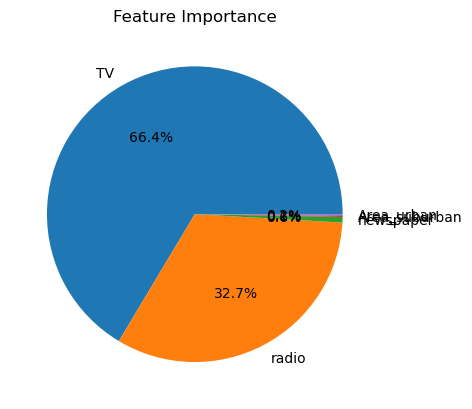

In [6]:
import matplotlib.pyplot as plt

# Assign the feature importances to a variable
importances = [0.6641651124893896, 0.32677694352944026, 0.0060786906069847, 0.0010462564881822027, 0.001932996886003188]

# Create a list of the feature names
features = ["TV", "radio", "newspaper", "Area_suburban", "Area_urban"]

# Create a pie chart
plt.pie(importances, labels=features, autopct='%1.1f%%')

# Add a title
plt.title("Feature Importance")

# Show the chart
plt.show()

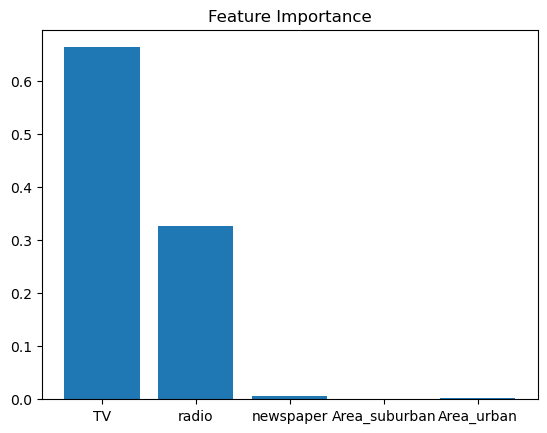

In [7]:
import matplotlib.pyplot as plt

# Assign the feature importances to a variable
importances = [0.6641651124893896, 0.32677694352944026, 0.0060786906069847, 0.0010462564881822027, 0.001932996886003188]

# Create a list of the feature names
features = ["TV", "radio", "newspaper", "Area_suburban", "Area_urban"]

# Create a bar chart
plt.bar(features, importances)

# Add a title
plt.title("Feature Importance")

# Show the chart
plt.show()
